In [836]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

# Exercises in linear regression

## Exercise 1

Load in the "EnergyEfficiency.csv" data (on Moodle). It is data about energy efficiency of buildings, more specifically it is about predicting the heating load and cooling load of building based on a set of features about the buildings. It is retrieved from UCI Machine Learning Repository: [Energy efficiency](https://archive.ics.uci.edu/dataset/242/energy+efficiency).

Answer the following questions:
1. Do a visualization of the relationship/correlation between the variables `SurfaceArea` and `HeatingLoad`.
2. Is there a correlation between `SurfaceArea` and `HeatingLoad`? If so, what is the strength of it and is it statistically significant?
3. Does the correlation make sense to you? What if you add `hue = "OverallHeight"` to your scatterplot?
4. Train a simple linear regression model with `SurfaceArea` as independent variable (x) and `HeatingLoad` as dependent variable (y).
5. What does the model say about the change `HeatingLoad` when the `SurfaceArea` goes up by 1 unit?
6. Add the linear regression line to a scatterplot of `SurfaceArea` and `HeatingLoad`.
7. Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.

## Exercise 2

In this exercise, we will continue from Exercise 1 and keep using the "EnergyEfficiency.csv" data (on Moodle).

Answer the following questions:
1. Train a multiple linear regression model for `HeatingLoad` using at least two other variables from the dataset as feature variables.
2. Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?
3. Check each of the assumptions/problems for linear regression.

## Exercise 3

In this exercise, we will use the Ames dataset from the multiple linear regression notebook.

Answer the following questions:
1. Can you train a linear regression model to achieve a lower RMSE than the models we saw in the multiple linear regression notebook?
2. Can you train a linear regression model to achieve a higher R-squared than the final model in the multiple linear regression notebook?
3. Do your models satisfy the assumptions of linear regression?

In [841]:
df = pd.read_csv("../Notebooks and data-5/EnergyEfficiency.csv")

In [842]:
df

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [843]:
df.describe()

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [844]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RelativeCompactness      768 non-null    float64
 1   SurfaceArea              768 non-null    float64
 2   WallArea                 768 non-null    float64
 3   RoofArea                 768 non-null    float64
 4   OverallHeight            768 non-null    float64
 5   Orientation              768 non-null    int64  
 6   GlazingArea              768 non-null    float64
 7   GlazingAreaDistribution  768 non-null    int64  
 8   HeatingLoad              768 non-null    float64
 9   CoolingLoad              768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [845]:
df.isna().sum()

RelativeCompactness        0
SurfaceArea                0
WallArea                   0
RoofArea                   0
OverallHeight              0
Orientation                0
GlazingArea                0
GlazingAreaDistribution    0
HeatingLoad                0
CoolingLoad                0
dtype: int64

In [846]:
df.duplicated().sum()

0

### 1. Do a visualization of the relationship/correlation between the variables SurfaceArea and HeatingLoad.

<Axes: xlabel='SurfaceArea', ylabel='HeatingLoad'>

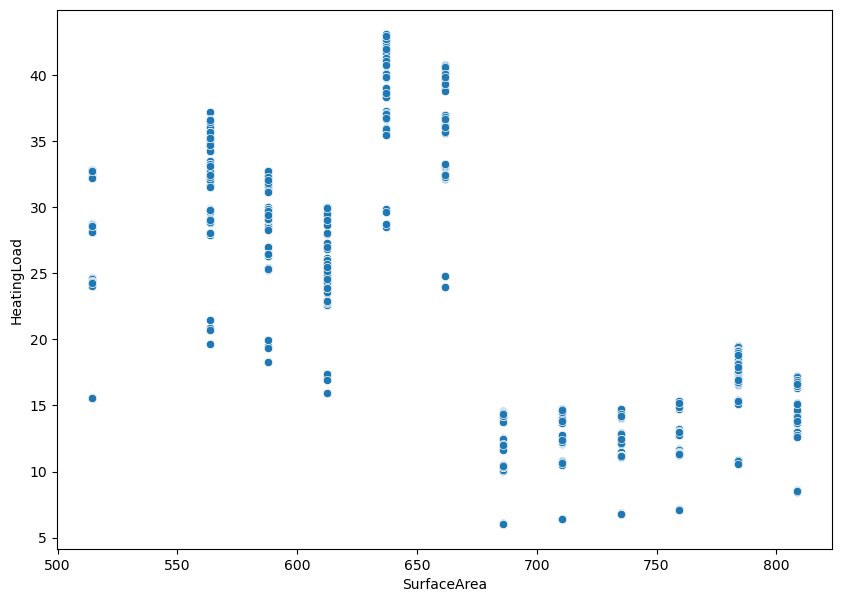

In [848]:
sns.scatterplot(data=df, x="SurfaceArea", y="HeatingLoad")

<Axes: xlabel='SurfaceArea', ylabel='HeatingLoad'>

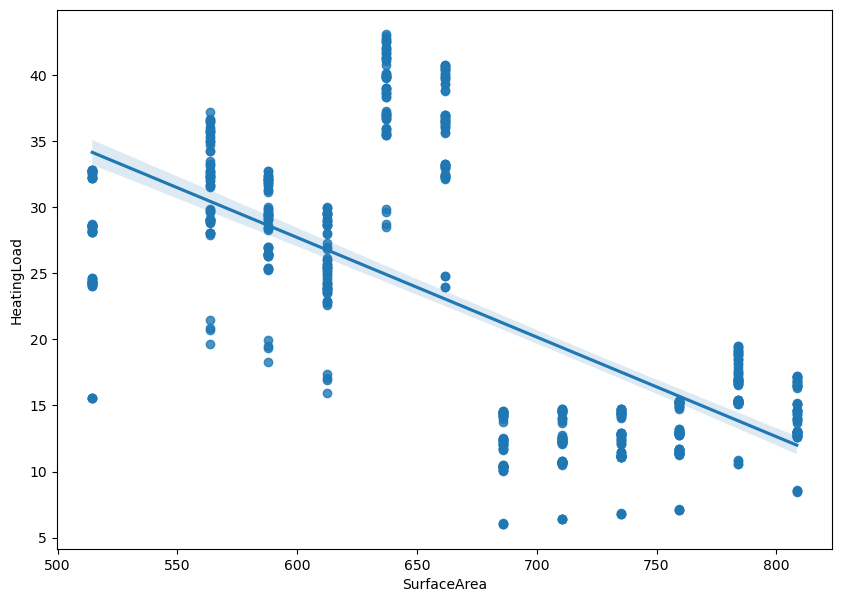

In [849]:
sns.regplot(data = df, x="SurfaceArea", y="HeatingLoad")

### 2. Is there a correlation between SurfaceArea and HeatingLoad? If so, what is the strength of it and is it statistically significant?

    don't you have to train it first to measure it's strength and to tell if it is statistically significant?
    We first train in question 4? 
    You just want an answer based on observation?

In [852]:
df[["SurfaceArea", "HeatingLoad"]]

,SurfaceArea,HeatingLoad
0,514.5,15.55
1,514.5,15.55
2,514.5,15.55
3,514.5,15.55
4,563.5,20.84
...,...,...
763,784.0,17.88
764,808.5,16.54
765,808.5,16.44
766,808.5,16.48


    There seems to be one, but it is hard to say for sure

    There seems to be two clusters that each has a small tendency to go up in HeatingLoad as SurfaceArea increases, but making a generalization of it all makes it give a clear negative coeficient because the first cluster is higher then the second

### 3. Does the correlation make sense to you? What if you add hue = "OverallHeight" to your scatterplot?

<Axes: xlabel='SurfaceArea', ylabel='HeatingLoad'>

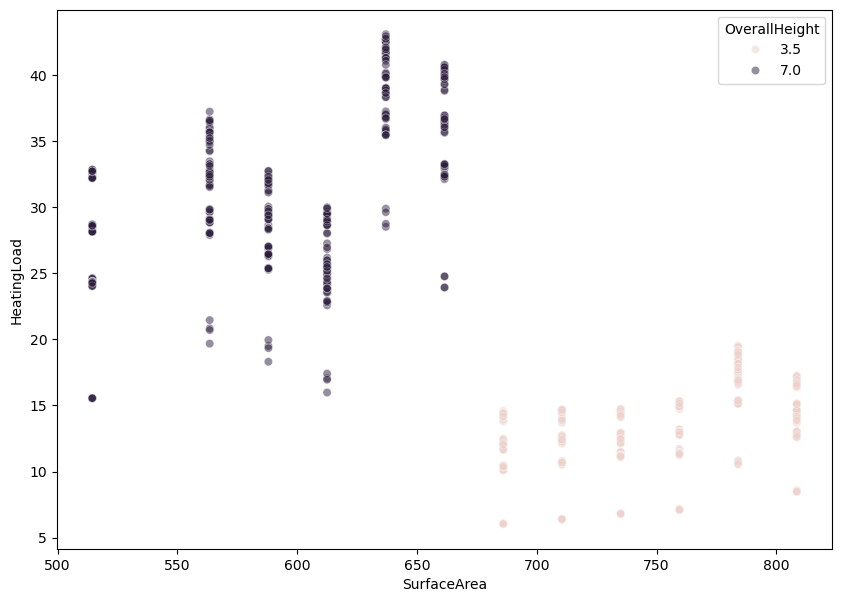

In [855]:
sns.scatterplot(data=df, x="SurfaceArea", y="HeatingLoad", hue="OverallHeight", alpha=0.5)

    Given this information it doesn't make sense as there seems to be to different clusters of data. Not sure what to make of it

### 4. Train a simple linear regression model with SurfaceArea as independent variable (x) and HeatingLoad as dependent variable (y).

In [858]:
y = df["HeatingLoad"]

In [859]:
X = df["SurfaceArea"]

In [860]:
X = sm.add_constant(X)

In [861]:
X

,const,SurfaceArea
0,1.0,514.5
1,1.0,514.5
2,1.0,514.5
3,1.0,514.5
4,1.0,563.5
...,...,...
763,1.0,784.0
764,1.0,808.5
765,1.0,808.5
766,1.0,808.5


In [862]:
linreg_model = sm.OLS(y, X).fit()

In [863]:
linreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeatingLoad   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     585.3
Date:                Sun, 16 Feb 2025   Prob (F-statistic):           1.69e-96
Time:                        17:09:46   Log-Likelihood:                -2646.6
No. Observations:                 768   AIC:                             5297.
Df Residuals:                     766   BIC:                             5306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          72.9454      2.111     34.554      0.000      68.801      77.090
SurfaceArea    -0.0754      0.003    -24.192      0.000      -0.082      -0.069
==============================================================================
Omnibus:                       37.973   Durbin-Watson:                   0.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.851
Skew:                           0.576   Prob(JB):                     4.95e-10
Kurtosis:                       2.890   Cond. No.                     5.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Interpretation of the model**

Here we see general information about the model at the top, such as R-squared (0.433) and  Adjusted R-squared (0.432)
The coef for SurfaceArea is -0.0754 for the slope indicating it is negative and not to step.
The pvalue is aproximately 0 meaning that the hypothesis can be rejected and that there is a correlation


### 5. What does the model say about the change HeatingLoad when the SurfaceArea goes up by 1 unit?

    When going one unit up on the SurfaceArea(x) axes, the correlated HeatingLoad(y) axis changes by -0.0754

### 6. Add the linear regression line to a scatterplot of SurfaceArea and HeatingLoad

In [868]:
pred_y = linreg_model.params["const"] + linreg_model.params["SurfaceArea"]*df["SurfaceArea"]

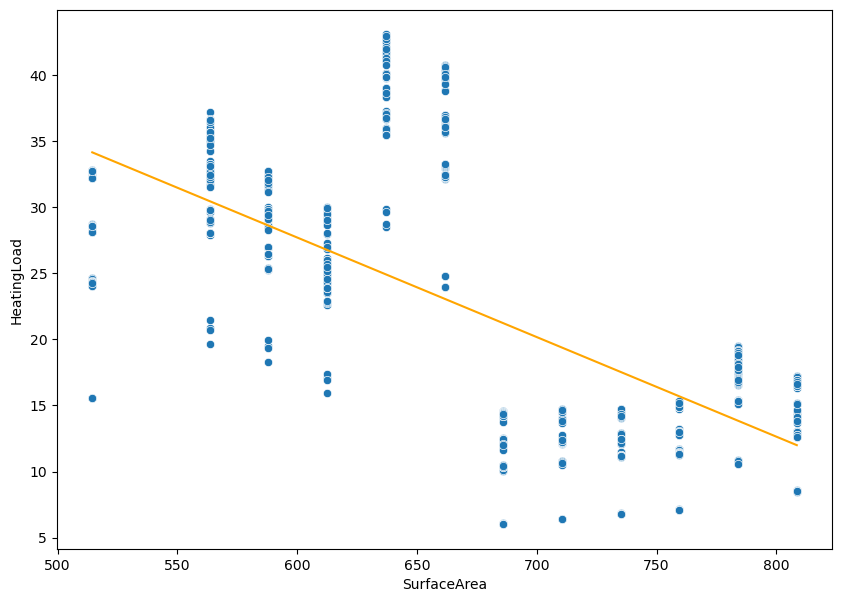

In [869]:
sns.scatterplot(data = df, x = "SurfaceArea", y = "HeatingLoad")
plt.plot(df["SurfaceArea"], pred_y, color = "orange")
plt.show()

### 7. Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.

In [871]:
#linreg_model.summary()

In [872]:
# R-squared, with the value 0.433 it tells that it might not be a good fit given it is numerical data of houses, closer to 1 the better
linreg_model.rsquared

0.43312223289382823

In [873]:
linreg_model.rsquared_adj # Adj. R-squared

0.4323821835895121

In [874]:
linreg_model.resid

0     -18.608690
1     -18.608690
2     -18.608690
3     -18.608690
4      -9.624719
         ...    
763     4.038149
764     4.545134
765     4.445134
766     4.485134
767     4.645134
Length: 768, dtype: float64

In [875]:
np.mean(np.abs(linreg_model.resid)) # MAE

6.002338517195693

In [876]:
np.mean(linreg_model.resid**2) #MSE

57.63983779426343

In [877]:
np.sqrt(np.mean(linreg_model.resid**2)) # RMSE

7.592090475900786

    Given the measures from RMSE and the interval of the HeatingLoad, the error seems to be quite big in comparison
    This is not a good model as there is different heights for the buildings and should be categorised or include more categorise for a general prediction model

## Exercise 2

In this exercise, we will continue from Exercise 1 and keep using the "EnergyEfficiency.csv" data (on Moodle).

Answer the following questions:
1. Train a multiple linear regression model for `HeatingLoad` using at least two other variables from the dataset as feature variables.
2. Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?
3. Check each of the assumptions/problems for linear regression.


### 1. Train a multiple linear regression model for HeatingLoad using at least two other variables from the dataset as feature variables.

In [881]:
X_df = df[["SurfaceArea", "RelativeCompactness", "GlazingArea"]]
X_df

,SurfaceArea,RelativeCompactness,GlazingArea
0,514.5,0.98,0.0
1,514.5,0.98,0.0
2,514.5,0.98,0.0
3,514.5,0.98,0.0
4,563.5,0.90,0.0
...,...,...,...
763,784.0,0.64,0.4
764,808.5,0.62,0.4
765,808.5,0.62,0.4
766,808.5,0.62,0.4


In [882]:
y_df = df["HeatingLoad"]
y_df

0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: HeatingLoad, Length: 768, dtype: float64

In [883]:
X_df_wInt = sm.add_constant(X_df)

In [884]:
mulinreg_model = sm.OLS(y, X_df_wInt).fit()

In [885]:
mulinreg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeatingLoad   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     329.0
Date:                Sun, 16 Feb 2025   Prob (F-statistic):          4.25e-137
Time:                        17:09:47   Log-Likelihood:                -2546.1
No. Observations:                 768   AIC:                             5100.
Df Residuals:                     764   BIC:                             5119.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 350.4465     28.140     12.454      0.000     295.205     405.688
SurfaceArea            -0.2903      0.022    -13.471      0.000      -0.333      -0.248
RelativeCompactness  -180.4643     17.949    -10.055      0.000    -215.699    -145.230
GlazingArea            20.4379      1.810     11.291      0.000      16.885      23.991
==============================================================================
Omnibus:                      117.214   Durbin-Watson:                   0.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.508
Skew:                           0.112   Prob(JB):                     3.91e-07
Kurtosis:                       2.066   Cond. No.                     9.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [886]:
mulinreg_model.params

const                  350.446471
SurfaceArea             -0.290341
RelativeCompactness   -180.464308
GlazingArea             20.437899
dtype: float64

### 2. Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?

In [888]:
print("linear R-squared:       ", linreg_model.rsquared)
print("multi linear R-squared: ", mulinreg_model.rsquared)
print("")
print("linear RMSE:       ", np.sqrt(np.mean(linreg_model.resid**2))) # RMSE
print("multi linear RMSE: ", root_mean_squared_error(y, pred_y)) # RMSE

linear R-squared:        0.43312223289382823
multi linear R-squared:  0.5636720852099282

linear RMSE:        7.592090475900786
multi linear RMSE:  7.592090475900788


    Given that R-squared for the multi linear is greater by 0.13 and that it's RMSE is smaller by 0.9, indicating less error,
    it is fair to say the multi linear is a better model to predict HeatLoad

### 3. Check each of the assumptions/problems for linear regression.

### Non-linearity of the data

One of the assumptions of linear regression is that there is a linear relationship between the independent (X) variables and the dependent variable (y). 

For simple linear regression, we can make a scatterplot of the x and y variable and visually inspect for linear relationship. However, for multiple linear regression, we cannot do that. Instead, we can plot the residuals versus the predicted values:

In [892]:
pred_y = mulinreg_model.predict()

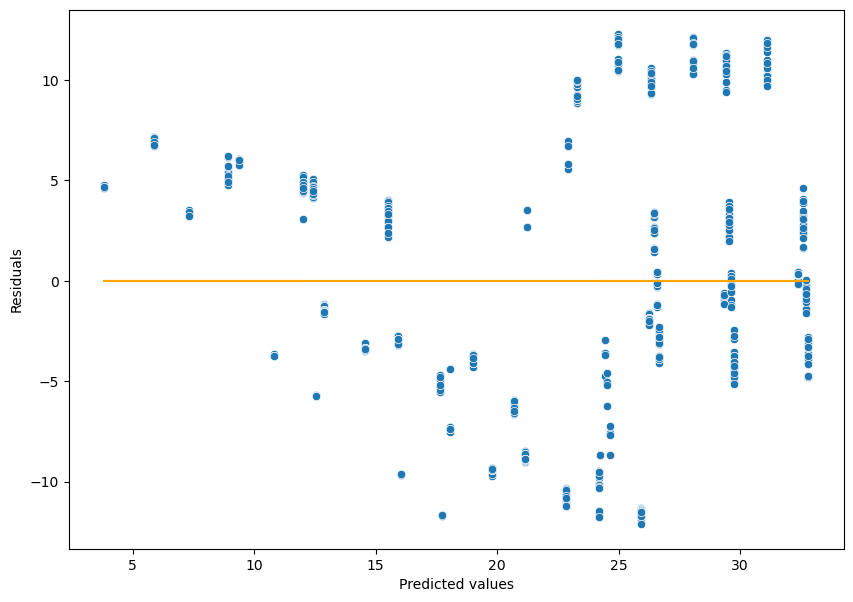

In [893]:
sns.scatterplot(x = pred_y, y = mulinreg_model.resid)
plt.plot(pred_y, np.repeat(0, len(pred_y)), color = "orange")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

    Seems to be a pattern, bit like a v, first above the line, then below, than above again, not random
    Not sure what to make of this, is it linear? I would say no

### Correlation of error terms 

Another assumption of linear regression is that the error terms are uncorrelated, in other words, the i'th error term $e_i$ does not tell us anything about i+1'th error term $e_{i+1}$. Thus, to investigate this, we can plot the residuals in order of their appearance (or by time, if there is a time variable). As we have no time variable, we can instead plot the residuals versus their row number.

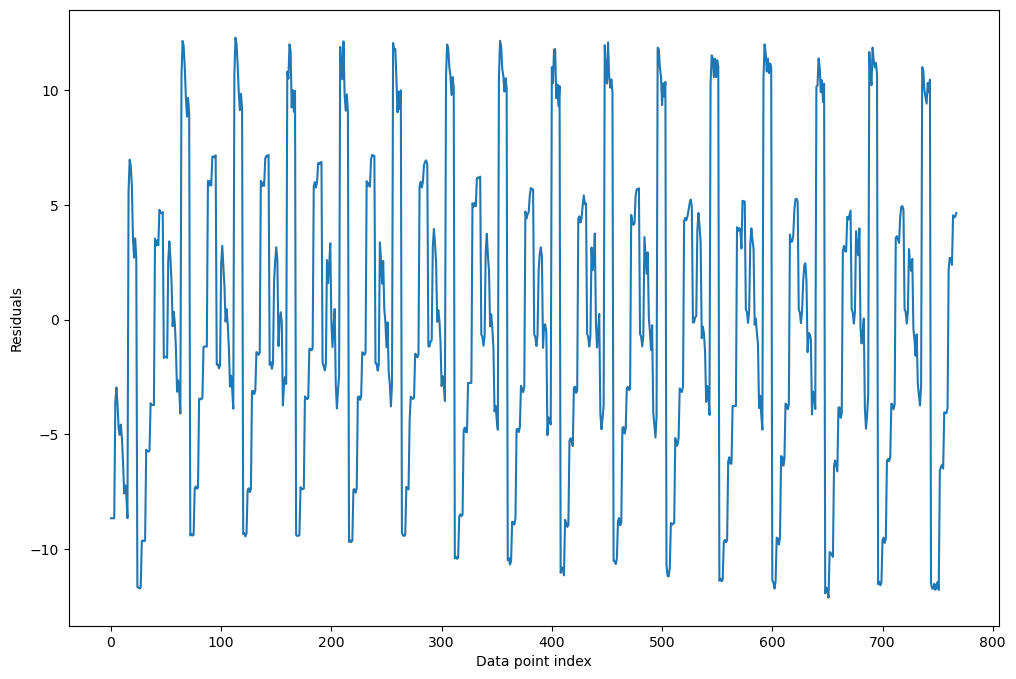

In [896]:
plt.rc("figure", figsize=(12, 8))
sns.lineplot(x = range(0, len(mulinreg_model.resid)), y = mulinreg_model.resid)
plt.ylabel("Residuals")
plt.xlabel("Data point index")
plt.show()

    Here there seems to be a very clear repeating pattern, with a little bit of variation

### Non-constant variance of error terms

Another assumption of linear regression is that the error terms have constant variance. One common way of seeing non-constant error terms it to look at the plot of residuals versus predicted values a look whether the variance increase as the predicted values do - it will look like a funnel. So let us look at this plot again:

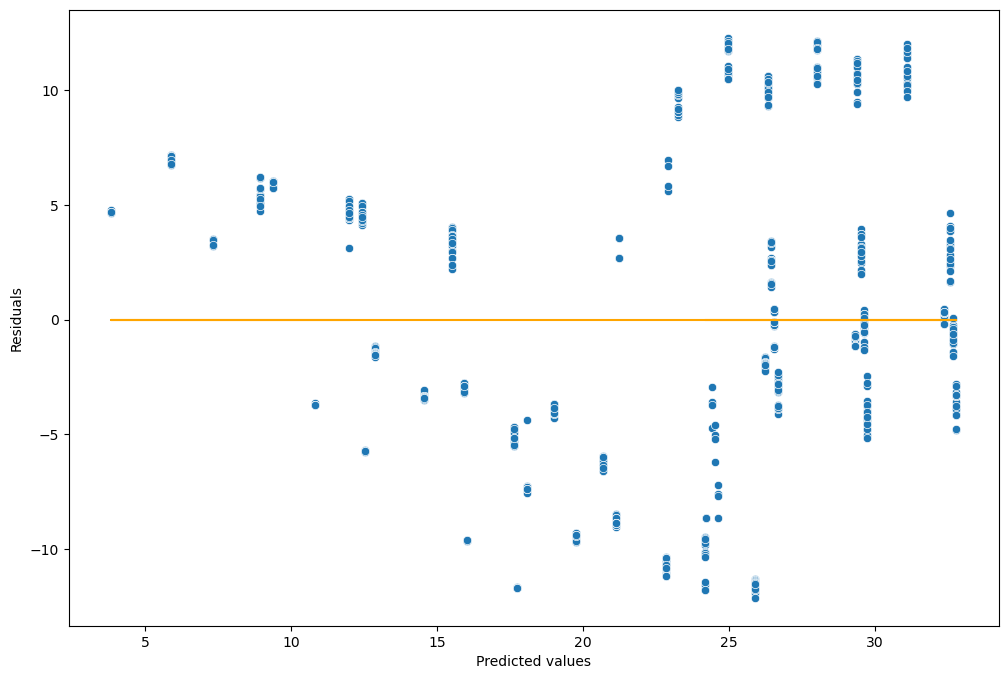

In [899]:
sns.scatterplot(x = pred_y, y = mulinreg_model.resid)
plt.plot(pred_y, np.repeat(0, len(pred_y)), color = "orange")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

    This just seems like a small part of the repeating pattern, would not seem to be a clear funnel, just for ever ops and downs of points

### Outliers

Outliers in regard to linear regression models, are points for which the predicted value is very far from the actual values. These we can also spot in the residual vs predicted values plot. So let us not make the plot again, but just look at the plot above.

    No outliers from the pattern

### High leverage points

High leverage points are a bit like residuals. They are point that as a high influence on how the model looks. In simple linear regression, this means that a high leverage point might heavily affect where the regression line lies. Note that outliers are extreme values in a sense, but they do not need to have high leverage as they might not affect the actual model fit that much.

High leverage points are usually points that have an x-value far away from the other x-values in the dataset. This is easy to spot in simple linear regression where we only have on x variable. However, it is much harder to spot directly for multiple linear regression. Luckily, there is a leverage statistics we can calculate for each point based on a linear regression model, which we can use to make a "Leverage plot".

In [904]:
leverageStats = mulinreg_model.get_influence().hat_matrix_diag
leverageStats

array([0.01539043, 0.01539043, 0.01539043, 0.01539043, 0.00765332,
       0.00765332, 0.00765332, 0.00765332, 0.00662323, 0.00662323,
       0.00662323, 0.00662323, 0.00748546, 0.00748546, 0.00748546,
       0.00748546, 0.00727719, 0.00727719, 0.00727719, 0.00727719,
       0.00728029, 0.00728029, 0.00728029, 0.00728029, 0.00574041,
       0.00574041, 0.00574041, 0.00574041, 0.00604815, 0.00604815,
       0.00604815, 0.00604815, 0.00602134, 0.00602134, 0.00602134,
       0.00602134, 0.00663372, 0.00663372, 0.00663372, 0.00663372,
       0.00811998, 0.00811998, 0.00811998, 0.00811998, 0.01102607,
       0.01102607, 0.01102607, 0.01102607, 0.01268153, 0.01268153,
       0.01268153, 0.01268153, 0.00494441, 0.00494441, 0.00494441,
       0.00494441, 0.00391432, 0.00391432, 0.00391432, 0.00391432,
       0.00477655, 0.00477655, 0.00477655, 0.00477655, 0.00456828,
       0.00456828, 0.00456828, 0.00456828, 0.00457139, 0.00457139,
       0.00457139, 0.00457139, 0.0030315 , 0.0030315 , 0.00303

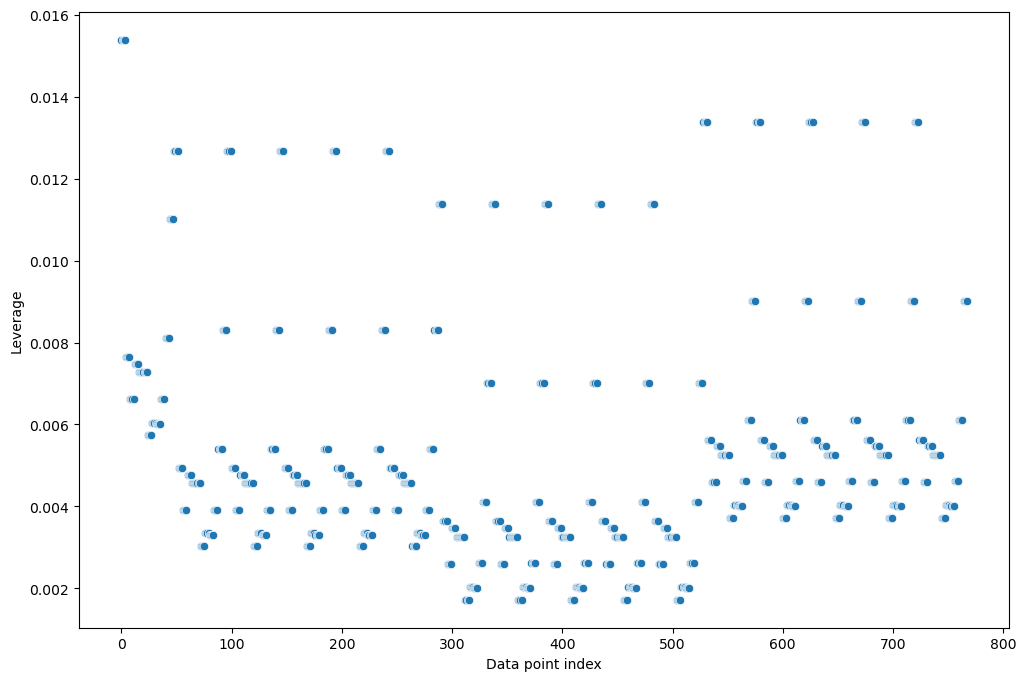

In [905]:
plt.rc("figure", figsize=(12, 8))
sns.scatterplot(x = range(0, len(leverageStats)), y = leverageStats)
plt.ylabel("Leverage")
plt.xlabel("Data point index")
plt.show()

    Again this is a repeating pattern, no big leverage points like you would expect, there are plenty of repeating big residual values that lies at around -10 and 10
    From the plot there is one a few points at around (0, 0.015) that are quite far away from the other points and alone

### Collinearity

Collinearity can also be a problem for linear regression models and refers to the existence of high correlation between two or more of the independent/predictor variables. IF two predictor variables are highly correlated, it can be hard/impossible for a linear regression model to separate out the effect on the response variable, coming from each of them - one might have a really high positive effect, while the other might have a really high negative effect, but in reality neither of them might have a big impact on the response variable.

The easiest way to spot collinearity between any pair of variables is to look at the correlation matrix:

In [908]:
X_df_wInt.corr()

,const,SurfaceArea,RelativeCompactness,GlazingArea
const,NaN,NaN,NaN,NaN
SurfaceArea,NaN,1.000000e+00,-9.919015e-01,3.636925e-15
RelativeCompactness,NaN,-9.919015e-01,1.000000e+00,-2.960552e-15
GlazingArea,NaN,3.636925e-15,-2.960552e-15,1.000000e+00


    most correlation values are very close to 0, meaning they have no strong correlation, but SurfaceArea and RelativeCompactness as a value of -0.991 which indicates a strong negative correlation
    Compactness and the surface are of course related as you would understand if the surface area increased a certain amount unit^2 volume would then increase unit^3 

## Exercise 3

### 1. Can you train a linear regression model to achieve a lower RMSE than the models we saw in the multiple linear regression notebook?

In [912]:
ames = pd.read_csv("../Notebooks and data-5/AmesHousing.csv")
ames

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [913]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [914]:
def define_model(features, y):

    mulinreg_model = sm.OLS(y, features).fit()
    print(mulinreg_model.params)

    pred_y = mulinreg_model.predict()

    print("\nR-2", r2_score(y, pred_y))
    print("RMSE", root_mean_squared_error(y, pred_y))

    return (mulinreg_model, pred_y)

In [915]:
X_ames = ames[["Lot Area", "Overall Cond", "Year Built", "Gr Liv Area", "TotRms AbvGrd", "Mo Sold", "Yr Sold"]]
X_ames

,Lot Area,Overall Cond,Year Built,Gr Liv Area,TotRms AbvGrd,Mo Sold,Yr Sold
0,31770,5,1960,1656,7,5,2010
1,11622,6,1961,896,5,6,2010
2,14267,6,1958,1329,6,6,2010
3,11160,5,1968,2110,8,4,2010
4,13830,5,1997,1629,6,3,2010
...,...,...,...,...,...,...,...
2925,7937,6,1984,1003,6,3,2006
2926,8885,5,1983,902,5,6,2006
2927,10441,5,1992,970,6,7,2006
2928,10010,5,1974,1389,6,4,2006


In [916]:
y_ames = ames["SalePrice"]

In [917]:
#mulinreg_model.summary()

In [918]:
X_ames_temp = ames[["Lot Area", "Overall Cond", "Year Built", "Gr Liv Area", "TotRms AbvGrd", "Mo Sold", "Yr Sold"]]
X_ames_temp = X_ames_temp.join(pd.get_dummies(ames["Bldg Type"], drop_first=True, dtype = "int"))
define_model(X_ames_temp, y)

ValueError: The indices for endog and exog are not aligned

In [ ]:
X_ames_temp = ames[["Lot Area", "Overall Cond", "Year Built", "Gr Liv Area", "TotRms AbvGrd"]]
X_ames_temp = X_ames_temp.join(pd.get_dummies(ames["Bldg Type"], drop_first=True, dtype = "int"))
define_model(X_ames_temp, y)

In [ ]:
ames.isna().sum()
#ames["Lot Frontage"].fillna(0, inplace=True) # works but throws error not to do it like this
columns_to_fill = ["Lot Frontage"]
ames.fillna({col: 0 for col in columns_to_fill}, inplace=True)

In [ ]:
X_ames_temp = ames[["Lot Area", "Overall Cond", "Year Built", "Gr Liv Area", "TotRms AbvGrd", "Pool Area", "MS SubClass", "Lot Frontage", "Misc Val"]]
#, "Misc Val" "MS SubClass", "Lot Frontage", "Pool Area"
X_ames_temp = X_ames_temp.join(pd.get_dummies(ames["Bldg Type"], drop_first=True, dtype = "int"))
X_ames_temp = X_ames_temp.join(pd.get_dummies(ames["Sale Condition"], drop_first=True, dtype = "int"))
X_ames_temp = X_ames_temp.join(pd.get_dummies(ames["Sale Type"], drop_first=True, dtype = "int"))
define_model(X_ames_temp, y)

    The notebook got an RMSE of: 43.473

    My Results: 43.479, 53.070, 47880

### I could not achieve a better result for the RMSE

### 2. Can you train a linear regression model to achieve a higher R-squared than the final model in the multiple linear regression notebook?

In [ ]:
X_ames_temp = ames[["Overall Cond", "Year Built", "Gr Liv Area", "Mo Sold", "Yr Sold"]]
X_ames_temp = X_ames_temp.join(pd.get_dummies(ames["Bldg Type"], drop_first=True, dtype = "int"))
X_ames_temp = X_ames_temp.join(pd.get_dummies(ames["Sale Condition"], drop_first=True, dtype = "int"))
X_ames_temp = X_ames_temp.join(pd.get_dummies(ames["Sale Type"], drop_first=True, dtype = "int"))
define_model(X_ames_temp, y).summary()

    The notebook got an R-squared of: 0.928

    My best result: 0.953

### 3. Do your models satisfy the assumptions of linear regression?

In [ ]:
def check_linear_assumptions_for_model(features, y_val):

    model, pred_y = define_model(features, y_val)

    fig, axes = plt.subplots(3, 1, figsize=(8,14)) 
    
    sns.scatterplot(x = pred_y, y = model.resid, alpha=0.6, ax=axes[0])
    axes[0].plot(pred_y, np.repeat(0, len(pred_y)), color = "orange")
    axes[0].set_xlabel("Predicted values")
    axes[0].set_ylabel("Residuals")

    sns.lineplot(x = range(0,len(model.resid)), y = model.resid, ax=axes[1])
    axes[1].set_xlabel("Data point index")
    axes[1].set_ylabel("Residuals")

    leverageStats = model.get_influence().hat_matrix_diag

    sns.scatterplot(x = range(0, len(leverageStats)), y = leverageStats, ax=axes[2])
    axes[2].set_xlabel("Data point index")
    axes[2].set_ylabel("Leverage")
    
    plt.show()

    return model

### RMSE

In [ ]:
X_ames_temp_RMSE = ames[["Lot Area", "Overall Cond", "Year Built", "Gr Liv Area", "TotRms AbvGrd", "Mo Sold", "Yr Sold"]]
X_ames_temp_RMSE = X_ames_temp_RMSE.join(pd.get_dummies(ames["Bldg Type"], drop_first=True, dtype = "int"))
check_linear_assumptions_for_model(X_ames_temp_RMSE, y_ames)

X_ames_temp_RMSE.corr()

### R-squared

In [ ]:
X_ames_temp_R_squared = ames[["Overall Cond", "Year Built", "Gr Liv Area", "Mo Sold", "Yr Sold"]]
X_ames_temp_R_squared = X_ames_temp_R_squared.join(pd.get_dummies(ames["Bldg Type"], drop_first=True, dtype = "int"))
X_ames_temp_R_squared = X_ames_temp_R_squared.join(pd.get_dummies(ames["Sale Condition"], drop_first=True, dtype = "int"))
X_ames_temp_R_squared = X_ames_temp_R_squared.join(pd.get_dummies(ames["Sale Type"], drop_first=True, dtype = "int"))
check_linear_assumptions_for_model(X_ames_temp_R_squared, y_ames)

X_ames_temp_R_squared.corr()

    An assumption of linear regression is that the error terms have constant variance(residuals).
    An assumption of linear regression is that the error terms are uncorrelated.

In [ ]:
### TODO: understand the assumptions of linear regression

    Both of them look quite similar but their are slight differences, as well as they have differences to the original material
    They do contain the overall same structure where the RMSE best model is very similar to to original material and doesn't have much of note

    R-squared best model:
    Has funneling but, doesn't steer as much above the line as the others, bit more centralized in it's residuals
    It has a single outlier otherwise the rest are very close together
    For the correlation for R-squared, their is a strong correlation between Partial and new with a correlation of 0.986577 which is very high

    They are have what seems to be funelling and no obvious correlation between terms. Given this you could make a decent assumption that the models follow linear regression and can be used as a model, tough further analyzing and more data would be helpfull to more critically say for sure the usage of the model.